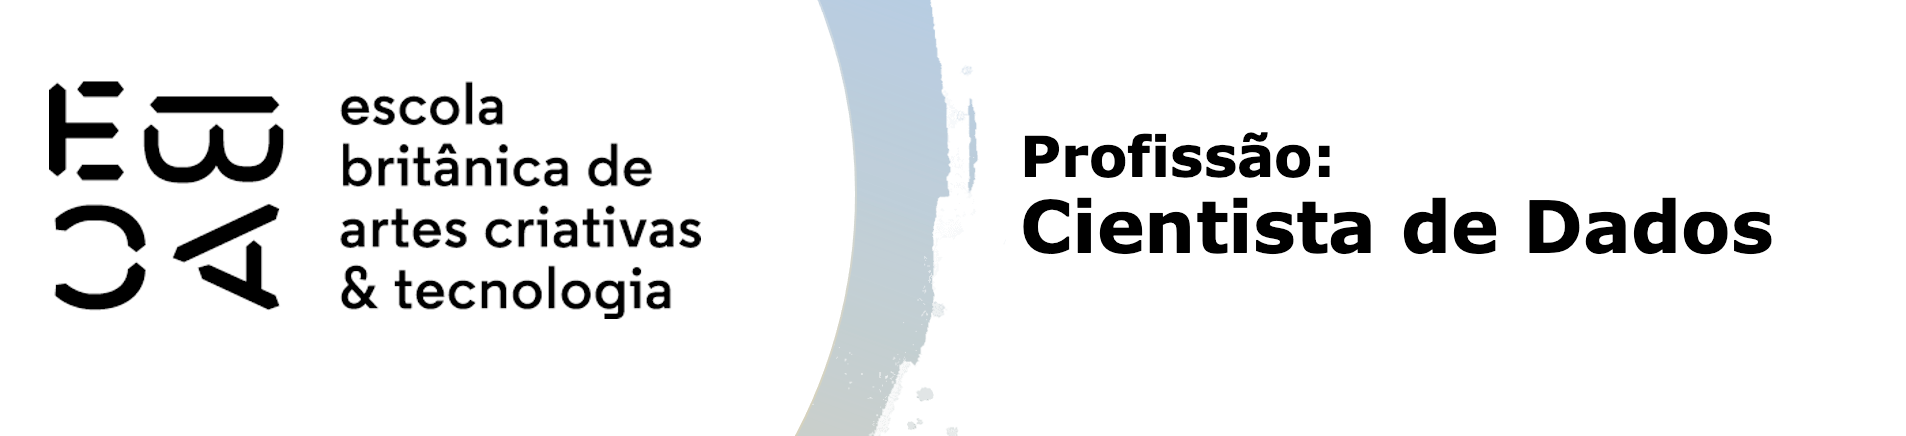

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

Valores ausentes por coluna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

Estatísticas descritivas:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                34.47

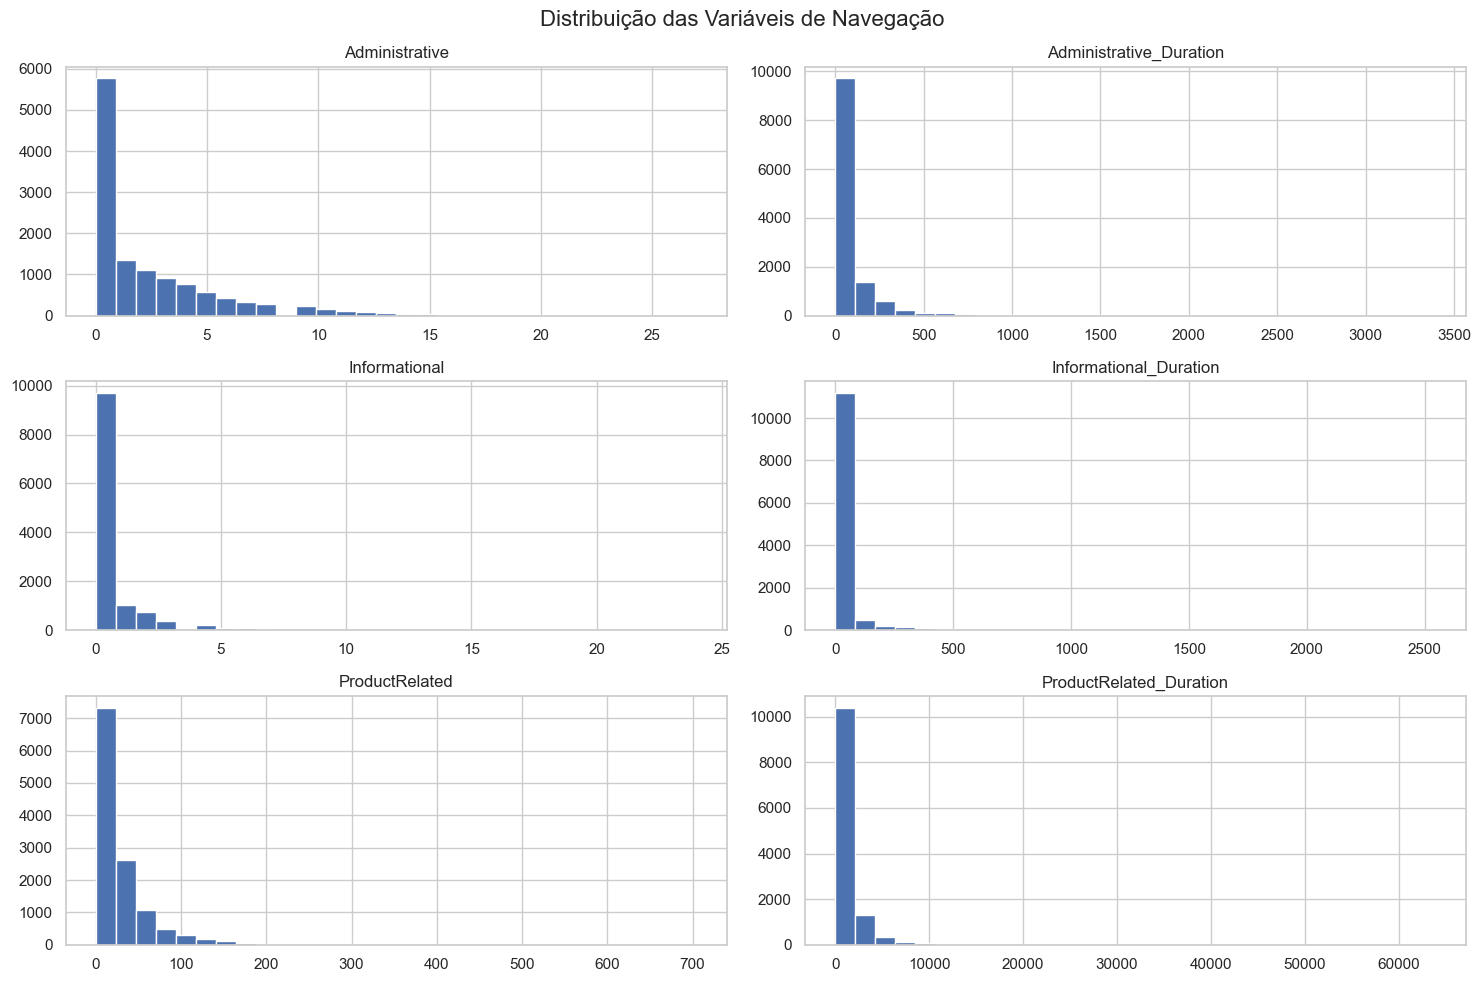

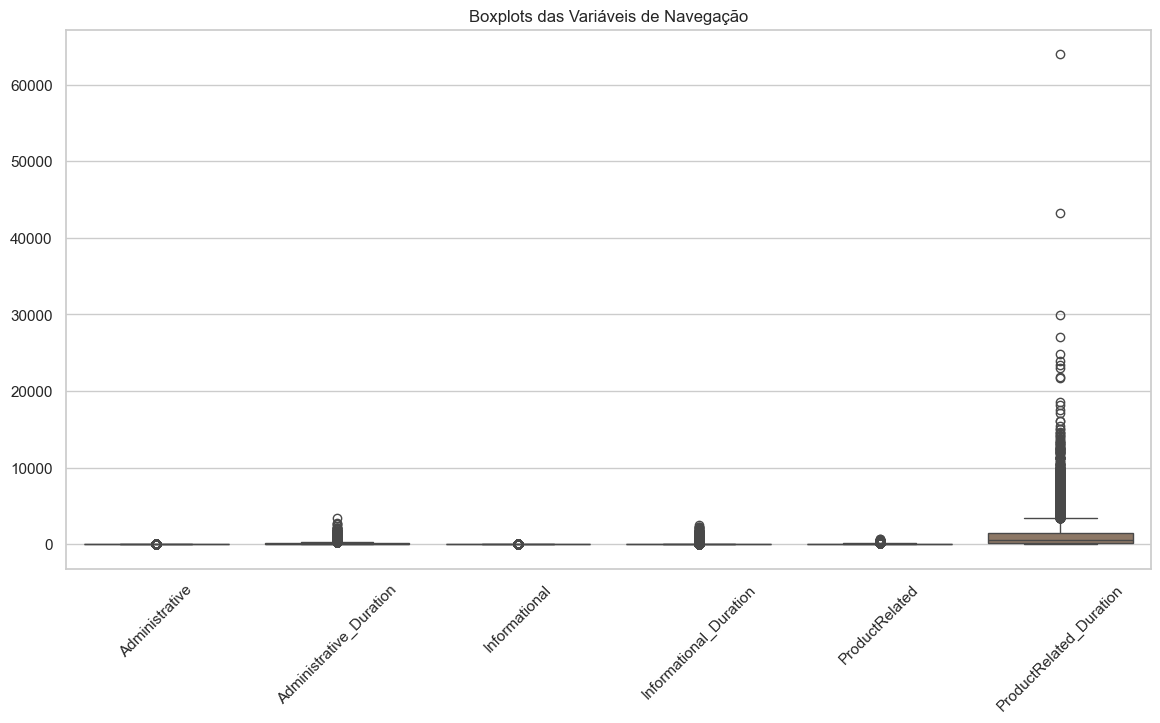

In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

df = pd.read_csv("online_shoppers_intention.csv")

cols_navegacao = [
    "Administrative", "Administrative_Duration",
    "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration"
]
df_nav = df[cols_navegacao]

print("Valores ausentes por coluna:")
print(df_nav.isnull().sum())

print("\nEstatísticas descritivas:")
print(df_nav.describe())

for col in ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]:
    negativos = df_nav[df_nav[col] < 0]
    print(f"\nValores negativos encontrados em {col}: {len(negativos)}")

df_nav = df_nav[
    (df_nav["Administrative_Duration"] >= 0) &
    (df_nav["Informational_Duration"] >= 0) &
    (df_nav["ProductRelated_Duration"] >= 0)
]

df_nav.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribuição das Variáveis de Navegação", fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_nav)
plt.title("Boxplots das Variáveis de Navegação")
plt.xticks(rotation=45)
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

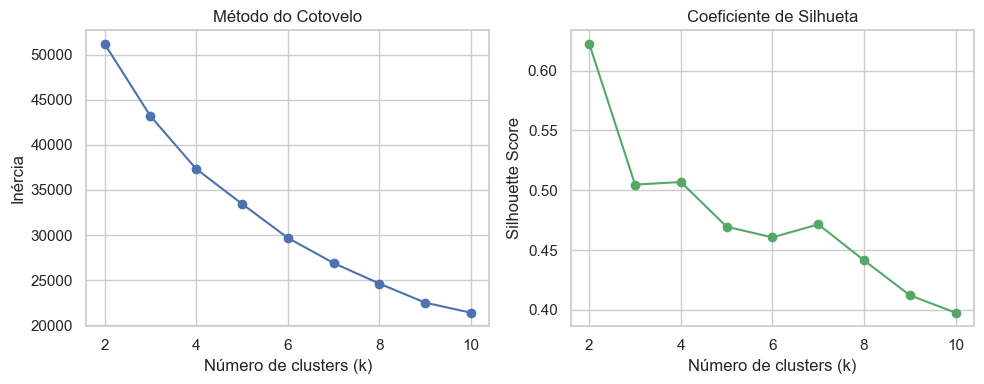

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nav)

inertia = []
silhouette_scores = []
k_range = range(2, 11)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silhueta')

plt.tight_layout()
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.


=== Agrupamento com k=3 ===

Média das variáveis por cluster:
         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0                  6.52                   251.03           0.97   
1                  7.06                   266.42           4.09   
2                  0.91                    24.28           0.16   

         Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster                                                                   
0                         42.30           55.54                  2056.32  
1                        458.37          138.38                  5731.11  
2                          6.53           18.90                   689.11  


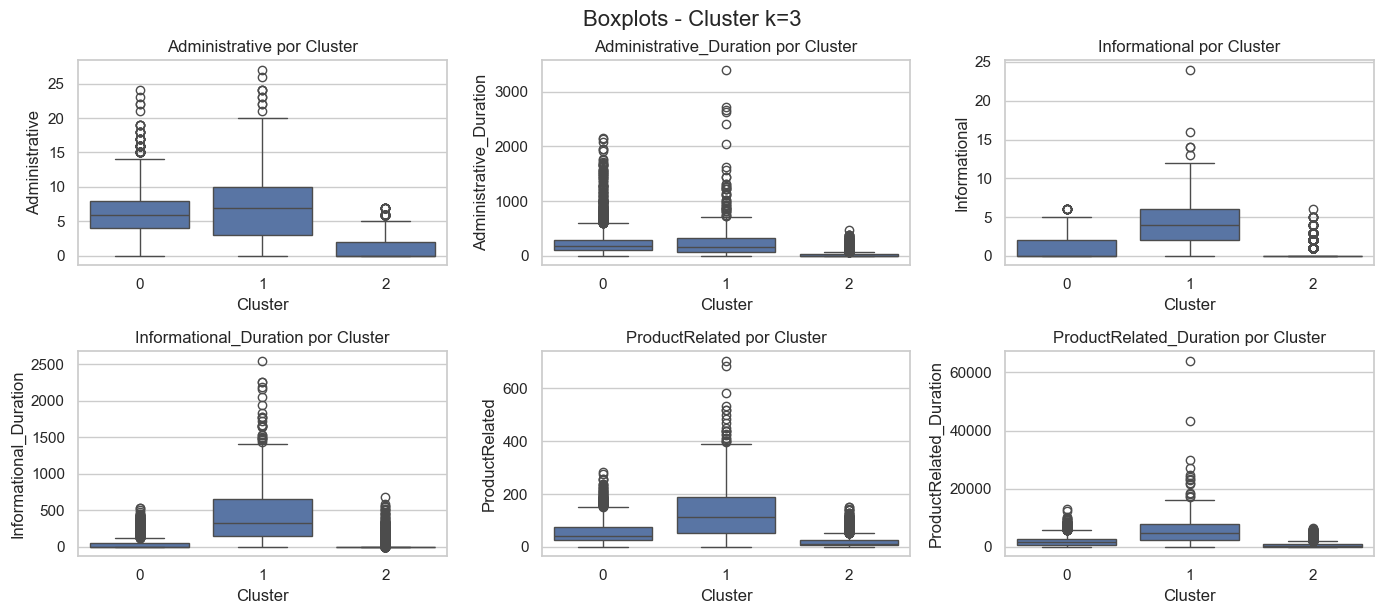


=== Agrupamento com k=4 ===

Média das variáveis por cluster:
         Administrative  Administrative_Duration  Informational  \
Cluster                                                           
0                  6.66                   260.89           0.73   
1                  5.58                   194.26           4.31   
2                  0.88                    23.32           0.16   
3                  8.07                   293.36           2.43   

         Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster                                                                   
0                         26.77           53.03                  1952.81  
1                        466.86           59.66                  2462.01  
2                          5.51           19.06                   696.81  
3                        174.94          239.74                  9700.90  


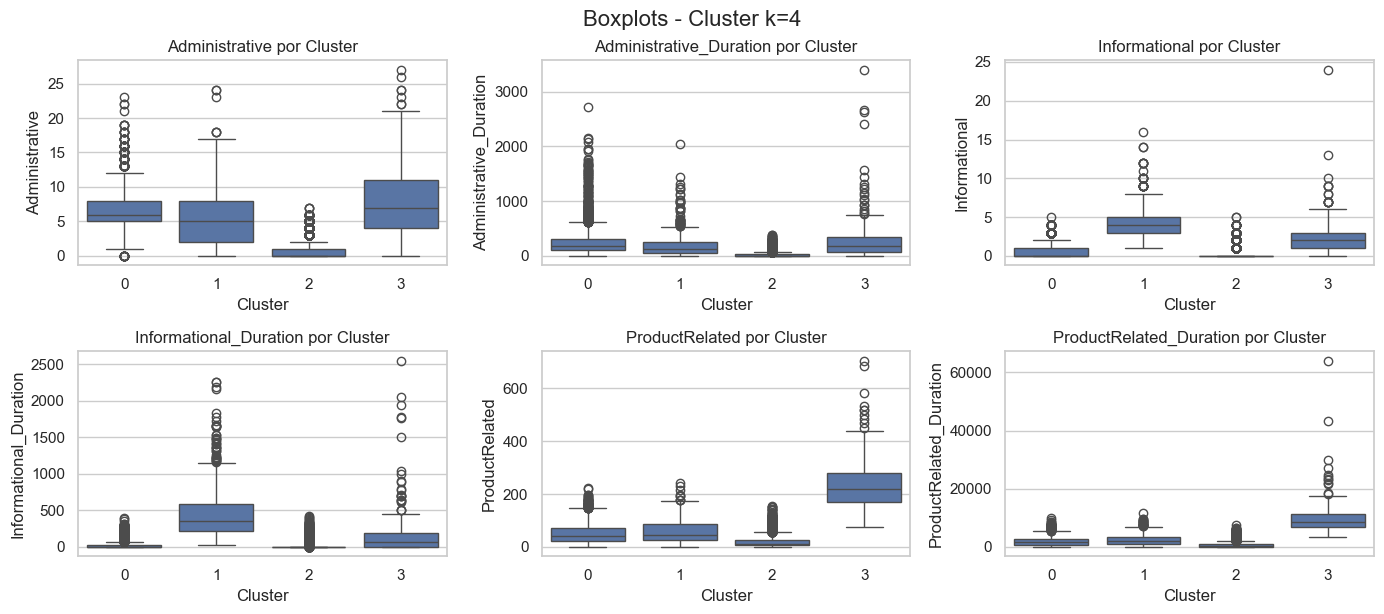

In [10]:
for k in [3, 4]:
    print(f"\n=== Agrupamento com k={k} ===")

    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)

    df_clustered = df_nav.copy()
    df_clustered['Cluster'] = labels

    print("\nMédia das variáveis por cluster:")
    print(df_clustered.groupby('Cluster').mean().round(2))

    plt.figure(figsize=(14, 6))
    for i, col in enumerate(df_nav.columns):
        plt.subplot(2, 3, i+1)
        sns.boxplot(x='Cluster', y=col, data=df_clustered)
        plt.title(f'{col} por Cluster')
    plt.tight_layout()
    plt.suptitle(f'Boxplots - Cluster k={k}', y=1.02, fontsize=16)
    plt.show()

Testamos soluções de agrupamento com k=3 e k=4, utilizando as seis variáveis relacionadas ao comportamento de navegação. A solução com 3 clusters foi escolhida por apresentar grupos bem distintos e de interpretação clara:

Cluster 0 – Visitante Interessado: realiza número razoável de acessos em páginas de produto, com boa duração de navegação.

Cluster 1 – Explorador Profundo: usuários muito ativos, que navegam por diversas seções com bastante tempo de sessão.

Cluster 2 – Visitante Casual: usuários com baixíssimo engajamento e acessos mínimos.

A versão com 4 clusters trouxe uma divisão adicional entre perfis intensos, mas com pouca diferença prática. Por isso, a versão com 3 grupos foi a escolhida para análises futuras.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [11]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(df_scaled)

compras_por_cluster = df.groupby('Cluster')['Revenue'].agg(['mean', 'count'])
compras_por_cluster['%_compradores'] = (compras_por_cluster['mean'] * 100).round(2)

print("Taxa de compra (Revenue) por cluster:")
print(compras_por_cluster)

bounce_por_cluster = df.groupby('Cluster')['BounceRates'].mean().round(4)

print("\nBounceRate médio por cluster:")
print(bounce_por_cluster)

Taxa de compra (Revenue) por cluster:
             mean  count  %_compradores
Cluster                                
0        0.231268   2469          23.13
1        0.306878    567          30.69
2        0.125134   9294          12.51

BounceRate médio por cluster:
Cluster
0    0.0065
1    0.0068
2    0.0273
Name: BounceRates, dtype: float64


Portanto, o Cluster 1 é o mais valioso comercialmente, sendo o perfil de cliente mais propenso à conversão. Estratégias de marketing e UX podem focar nesse grupo para maximizar resultados.